Data Importing and Inspection:
1. Import the necessary libraries (pandas, numpy, matplotlib.pyplot).
2. Load the Titanic dataset (you can download it from here) using pandas.
3. Use .head(), .info(), and .describe() methods to inspect the DataFrame.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# path of the Titanic train and test datasets
train_dataset = 'D:/Big Data Analytics - Term1/Big Data Tools/Works/Pandas Assignment/Titanic_datasets/train.csv'
test_dataset = 'D:/Big Data Analytics - Term1/Big Data Tools/Works/Pandas Assignment/Titanic_datasets/test.csv'

# Load the train and test datasets into a DataFrame
df_train = pd.read_csv(train_dataset) # dataframe for train dataset
df_test = pd.read_csv(test_dataset) # dataframe for test dataset

# Inspections of created train and test datasets
print(df_train.head()) #shows first five records of the train dataset
# print(df_test.head()) #shows first five records of the test dataset

#print (df_train.info()) #gives info about the train dataset
# print (df_test.info()) #gives info about the test dataset

#print (df_train.describe()) #describes the train dataset
# print (df_test.describe()) #describes the test dataset



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Data Selection:
1. Select the 'Survived', 'Pclass', 'Sex', 'Age', and 'Fare' columns and save them in a new
DataFrame.
2. Select rows where 'Age' is greater than 30 using boolean indexing.

In [93]:
#Data Selection
new_df = df_train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]#creating new Dataframe 'new_df'  from 'df_train'

filtered_df = new_df[new_df['Age'] > 30] #selecting records whose 'Age' > 30
print(filtered_df)

     Survived  Pclass     Sex   Age     Fare
1           1       1  female  38.0  71.2833
3           1       1  female  35.0  53.1000
4           0       3    male  35.0   8.0500
6           0       1    male  54.0  51.8625
11          1       1  female  58.0  26.5500
..        ...     ...     ...   ...      ...
873         0       3    male  47.0   9.0000
879         1       1  female  56.0  83.1583
881         0       3    male  33.0   7.8958
885         0       3  female  39.0  29.1250
890         0       3    male  32.0   7.7500

[305 rows x 5 columns]


Data Cleaning:
1. Identify columns with missing values.
2. Handle missing values appropriately (e.g., drop them, fill them with mean/median/mode,
etc.).
3. Find any duplicate rows and remove them from the DataFrame.

In [94]:
new_df.isnull().sum(axis = 0) #checking for null values, if any
mean_age_new_df = new_df.loc[:,'Age'].mean() #calculationg mean of the column 'Age' from 'new_df'
# print(mean_age_new_df)
new_df.loc[:,'Age'] = new_df.loc[:,'Age'].fillna(mean_age_new_df) #filling the null-values in column 'Age' with mean value
new_df.isnull().sum() #checking for null values, if any

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

Data Manipulation:
1. Add a new column 'Age_group' to the DataFrame which categorizes passengers as 'Child'
(age <= 18), 'Adult' (18 < age < 60), or 'Senior' (age >= 60).
2. Use the groupby() function to find the average 'Fare' and 'Age' for each 'Pclass'.
3. Merge this grouped data with the original DataFrame

In [95]:
# Function to categorize age of passengers
def categorize_age(age):
    if age<=18:
        return 'Child'
    if 18<age<60:
        return 'Adult'
    else:
        return 'Senior'

# Applying 'categorize_age' function to 'Age' column to forn new column 'Age_group"
new_df.loc[:,'Age_group'] = new_df.loc[:,'Age'].apply(categorize_age)

#print(new_df)

# using groupby() function to find the average 'Fare' and 'Age' for each 'Pclass'
avg_by_Pclass = new_df.groupby('Pclass').agg({'Fare':'mean', 'Age':'mean'}).reset_index()
# print(avg_by_Pclass)

# Merging the grouped data with the original DataFrame
new_df = pd.merge(new_df, avg_by_Pclass, on='Pclass', suffixes=('', '_avg'))
print(new_df)

     Survived  Pclass     Sex        Age     Fare Age_group   Fare_avg  \
0           0       3    male  22.000000   7.2500     Adult  13.675550   
1           1       3  female  26.000000   7.9250     Adult  13.675550   
2           0       3    male  35.000000   8.0500     Adult  13.675550   
3           0       3    male  29.699118   8.4583     Adult  13.675550   
4           0       3    male   2.000000  21.0750     Child  13.675550   
..        ...     ...     ...        ...      ...       ...        ...   
886         1       2  female  27.000000  13.8583     Adult  20.662183   
887         1       2  female  28.000000  24.0000     Adult  20.662183   
888         1       2  female  25.000000  26.0000     Adult  20.662183   
889         0       2    male  28.000000  10.5000     Adult  20.662183   
890         0       2    male  27.000000  13.0000     Adult  20.662183   

       Age_avg  
0    26.403259  
1    26.403259  
2    26.403259  
3    26.403259  
4    26.403259  
..       

C:\Users\bikas\AppData\Local\Temp\ipykernel_39024\2516924717.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:,'Age_group'] = new_df.loc[:,'Age'].apply(categorize_age)


Data Transformation:
1. Create a pivot table showing the total 'Fare' collected for each 'Pclass', separated by 'Sex'.
2. Melt the DataFrame to have 'Pclass', 'Sex', 'Age_group', and 'Survived' as identifier variables
and 'Fare' as the value variable.

In [96]:
# Creating a pivot table to show the total 'Fare' collected for each 'Pclass', separated by 'Sex'
pivot_table_fare = new_df.pivot_table(index='Pclass', columns='Sex', values='Fare', aggfunc='sum', fill_value=0)
# print(pivot_table_fare)


# Melting the DataFrame to have 'Pclass', 'Sex', 'Age_group', and 'Survived' as identifier variables and 'Fare' as the value variable

melted_df = pd.melt(new_df, id_vars=['Pclass', 'Sex', 'Age_group', 'Survived'], value_vars=['Fare'], var_name='Fare_type', value_name = 'fare')
print(melted_df)


     Pclass     Sex Age_group  Survived Fare_type     fare
0         3    male     Adult         0      Fare   7.2500
1         3  female     Adult         1      Fare   7.9250
2         3    male     Adult         0      Fare   8.0500
3         3    male     Adult         0      Fare   8.4583
4         3    male     Child         0      Fare  21.0750
..      ...     ...       ...       ...       ...      ...
886       2  female     Adult         1      Fare  13.8583
887       2  female     Adult         1      Fare  24.0000
888       2  female     Adult         1      Fare  26.0000
889       2    male     Adult         0      Fare  10.5000
890       2    male     Adult         0      Fare  13.0000

[891 rows x 6 columns]


Data Visualization and Analysis:
1. Use the matplotlib library to plot histograms for 'Age' and 'Fare'.
2. Plot a bar chart showing survival count for each 'Pclass'.
3. Analyze the relationship between survival rate and other factors in the dataset (e.g., 'Sex',
'Pclass', 'Age_group').

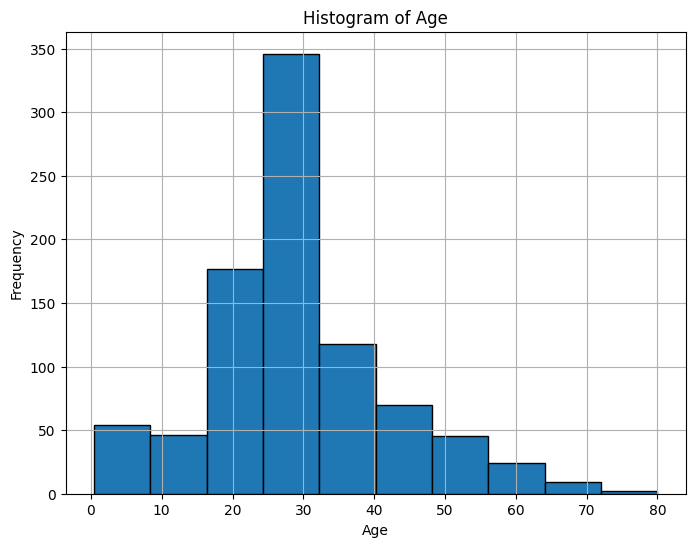

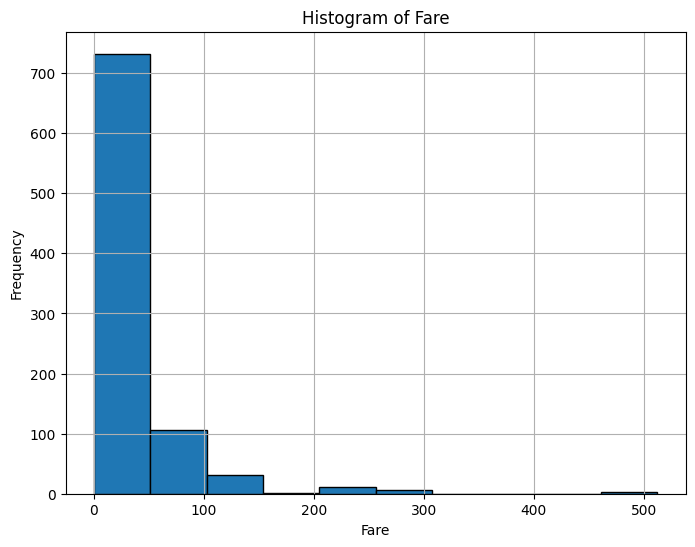

In [97]:
# Using the matplotlib library to plot histograms for 'Age' and 'Fare'

# Plot histogram for 'Age'
plt.figure(figsize=(8, 6))
plt.hist(new_df['Age'], bins=10, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram for 'Fare'
plt.figure(figsize=(8, 6))
plt.hist(new_df['Fare'], bins=10, edgecolor='black')
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


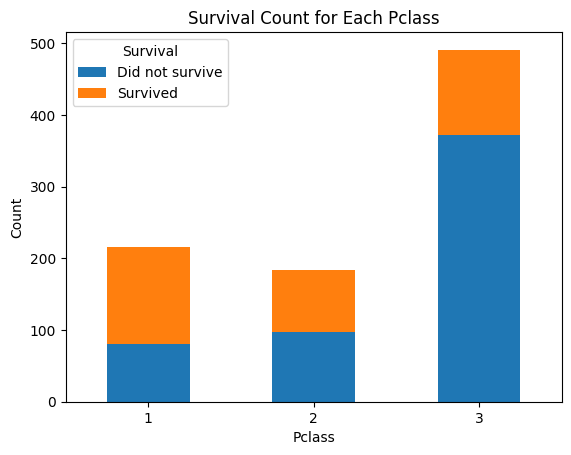

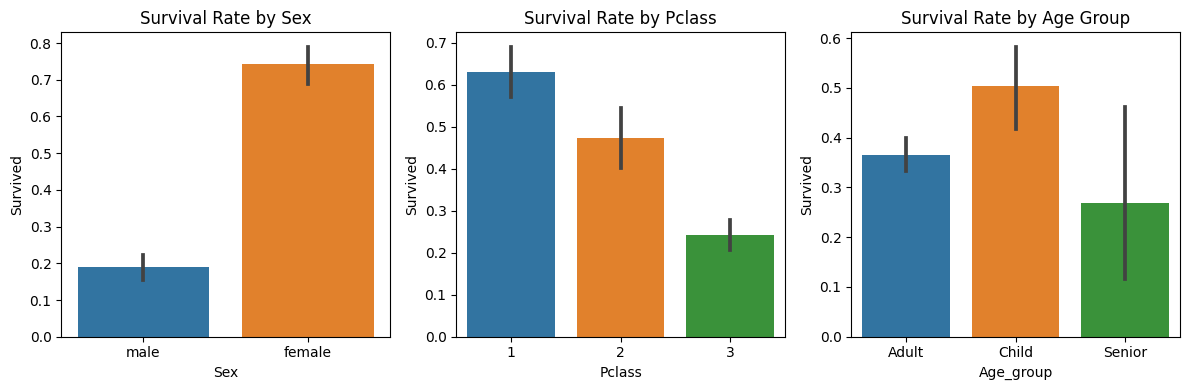

Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Age Group:
Age_group
Adult     0.365014
Child     0.503597
Senior    0.269231
Name: Survived, dtype: float64


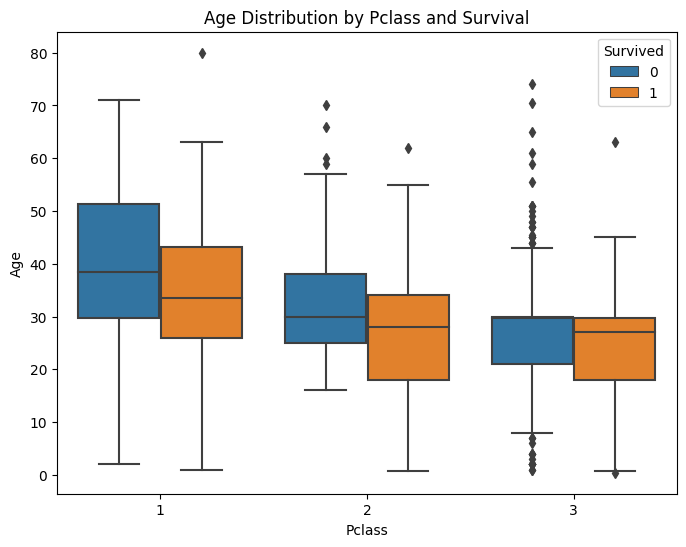

In [120]:
# Calculate survival count for each 'Pclass'
survival_count = new_df.groupby('Pclass')['Survived'].value_counts()
print(survival_count)



# Plot a bar chart showing survival count for each 'Pclass'
survival_count.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival Count for Each Pclass')
plt.xticks(rotation=0)
plt.legend(title='Survival', labels=['Did not survive', 'Survived'])
plt.show()

# Analyze the relationship between survival rate and other factors in the dataset (e.g., 'Sex','Pclass', 'Age_group').

# Step 1: Bar Plots
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.barplot(x='Sex', y='Survived', data=new_df)
plt.title('Survival Rate by Sex')

plt.subplot(132)
sns.barplot(x='Pclass', y='Survived', data=new_df)
plt.title('Survival Rate by Pclass')

plt.subplot(133)
sns.barplot(x='Age_group', y='Survived', data=new_df)
plt.title('Survival Rate by Age Group')

plt.tight_layout()
plt.show()

# Step 2: Groupby and Aggregation
survival_by_sex = new_df.groupby('Sex')['Survived'].mean()
survival_by_pclass = new_df.groupby('Pclass')['Survived'].mean()
survival_by_age_group = new_df.groupby('Age_group')['Survived'].mean()

print('Survival Rate by Sex:')
print(survival_by_sex)

print('\nSurvival Rate by Pclass:')
print(survival_by_pclass)

print('\nSurvival Rate by Age Group:')
print(survival_by_age_group)

# Step 3: Additional Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=new_df)
plt.title('Age Distribution by Pclass and Survival')
plt.show()